# Ejercicio 1: Estimacion ecuación lineal con dos parámetros
$y=\omega_1 · X_1 + \omega_2 · X_2 + cte.$

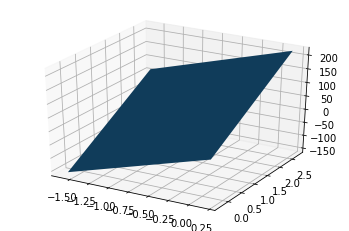

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


cte = 2
x,y, coef= datasets.make_regression(random_state=42,n_features=2,coef=True,bias=cte)
omega = coef[0]
omega2 = coef[1]


#Imprimimos

fig = plt.figure()
ax = fig.gca(projection='3d')

#Para el 3D hace falta un grid
X, Y = np.meshgrid(x[0],x[1])
Z = X*omega + Y*omega2 + cte

# Plot the surface.
ax.plot_surface(X, Y, Z)


plt.show()

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

 
# Creamos la red neuronal
model = Sequential()

# Añadimos la Neurona, que está en una capa densa, con dos entradas (cada uno de
# los parámetros y la constane. La activación lineal devuelve el rango de reales
model.add(Dense(1, input_shape=(2,), use_bias=True, activation='linear'))
print(model.summary())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [3]:


#La red ha inicializado los parámetros
weights = model.layers[0].get_weights()
print(weights)

xw_init = weights[0][0][0]
xw2_init = weights[0][1][0]

b_init = weights[1][0]


print("""\nModelo de regresion lineal inicializado con:
w1: %.2f w2: %.2f b: %.2f 
(Objetivo w1: %.2f  w2: %.2f b: %.2f)
""" % (xw_init, xw2_init, b_init, omega,omega2, cte))


model.compile(optimizer='sgd', loss='mean_squared_error')

print(x.shape)
print(x[:5,:])
model.fit(x,y, batch_size=1, epochs=30)


weights = model.layers[0].get_weights()
xw_fin = weights[0][0][0]
xw2_fin = weights[0][1][0]

b_fin = weights[1][0]


print("""\nModelo de regresion lineal Final con:
w1: %.2f w2: %.2f b: %.2f 
(Objetivo w1: %.2f  w2: %.2f b: %.2f)
""" % (xw_fin, xw2_fin, b_fin,omega,omega2, cte))

[array([[ 0.207757 ],
       [-0.3417263]], dtype=float32), array([0.], dtype=float32)]

Modelo de regresion lineal inicializado con:
w1: 0.21 w2: -0.34 b: 0.00 
(Objetivo w1: 87.74  w2: 74.08 b: 2.00)

(100, 2)
[[-1.60748323  0.18463386]
 [-0.26465683  2.72016917]
 [ 1.46564877 -0.2257763 ]
 [ 1.86577451  0.47383292]
 [-1.0708925   0.48247242]]
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 2s 15ms/step - loss: 3313.0703
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 106.6510
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 4.6391
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2451
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 7.6346e-04
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 4.3604e-05
Epoch 8/30
100/100 [===

In [0]:

#Para el 3D hace falta un grid
Z_hat = X*xw_fin + Y*xw2_fin + b_fin

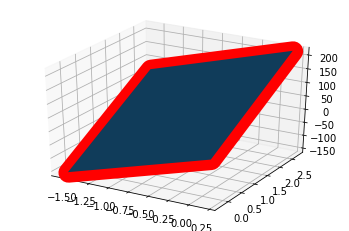

In [5]:

fig = plt.figure()
ax = fig.gca(projection='3d')


# Plot the surface.
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z_hat,alpha=0,linewidth=20, edgecolors='r')

plt.show()

# 2. CIFAR 10


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


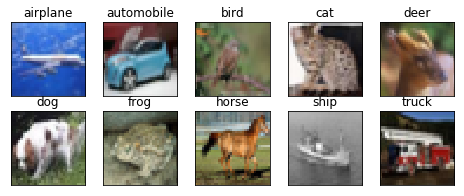

(32, 32, 3)


In [6]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
num_classes=10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (0, 1, 2))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()



# De clase a one hot enconder.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

input_shape= x_train.shape[1:]
print(input_shape)

In [7]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 10
# epochs = 100

num_predictions = 20





model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


########################################################################################################
# Data augmentation
########################################################################################################
#     print('Using real-time data augmentation.')
#     # This will do preprocessing and realtime data augmentation:
#     datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         zca_epsilon=1e-06,  # epsilon for ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         # randomly shift images horizontally (fraction of total width)
#         width_shift_range=0.1,
#         # randomly shift images vertically (fraction of total height)
#         height_shift_range=0.1,
#         shear_range=0.,  # set range for random shear
#         zoom_range=0.,  # set range for random zoom
#         channel_shift_range=0.,  # set range for random channel shifts
#         # set mode for filling points outside the input boundaries
#         fill_mode='nearest',
#         cval=0.,  # value used for fill_mode = "constant"
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False,  # randomly flip images
#         # set rescaling factor (applied before any other transformation)
#         rescale=None,
#         # set function that will be applied on each input
#         preprocessing_function=None,
#         # image data format, either "channels_first" or "channels_last"
#         data_format=None,
#         # fraction of images reserved for validation (strictly between 0 and 1)
#         validation_split=0.0)

#     # Compute quantities required for feature-wise normalization
#     # (std, mean, and principal components if ZCA whitening is applied).
#     datagen.fit(x_train)

#     # Fit the model on the batches generated by datagen.flow().
#     model.fit_generator(datagen.flow(x_train, y_train,
#                                      batch_size=batch_size),
#                         epochs=epochs,
#                         validation_data=(x_test, y_test),
#                         workers=4)
########################################################################################################

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 385us/step - loss: 1.8464 - acc: 0.3161 - val_loss: 1.7184 - val_acc: 0.3676
Epoch 2/10
50000/50000 [==============================] - 16s 329us/step - loss: 1.5339 - acc: 0.4412 - val_loss: 1.3916 - val_acc: 0.4996
Epoch 3/10
50000/50000 [==============================] - 15s 293us/step - loss: 1.4014 - acc: 0.4960 - val_loss: 1.2719 - val_acc: 0.5471
Epoch 4/10
50000/50000 [==============================] - 21s 428us/step - loss: 1.3084 - acc: 0.5308 - val_loss: 1.2052 - val_acc: 0.5652
Epoch 5/10
50000/50000 [==============================] - 22s 430us/step - loss: 1.2377 - acc: 0.5603 - val_loss: 1.1396 - val_acc: 0.5934
Epoch 6/10
50000/50000 [==============================] - 22s 438us/step - loss: 1.1787 - acc: 0.5830 - val_loss: 1.0885 - val_acc: 0.6194
E

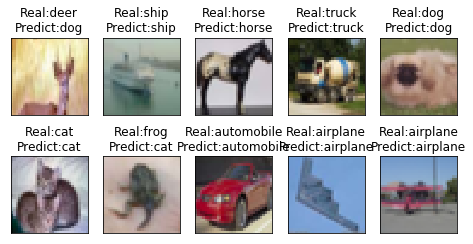

In [8]:
import random

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

y_hat = model.predict(x_test)
  
fig = plt.figure(figsize=(8,4))
idx = 0
for i in random.sample(range(x_test.shape[0]), 10):
    ax = fig.add_subplot(2, 5, 1 + idx, xticks=[], yticks=[])
    im = np.transpose(x_test[i], (0, 1, 2))
    ax.set_title("Real:" + class_names[np.argmax(y_test[i])] +"\nPredict:" +class_names[np.argmax(y_hat[i])])
    plt.imshow(im)
    idx +=1
plt.show()